<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Byron, I am a reviewer on this project. Congratulations on submitting the numerical methods project! 🎉
    

I will be using the standard color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ✔️</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ⚠️</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ❌</b>

Issues that need to be corrected to get right results are indicated in red comments. Note that the project cannot be accepted until these issues are resolved.
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** so that it would be easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content; however, they are convenient, since you can immediately go to them.
   
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> excellent job on this project, thank you so much! 
    
    
- You have successfully explored the dataframe and conducted preprocessing;
    
    
- The project also has the EDA part, well done!   
    
    
- You have trained and compared several models and their training speed, great!
    
    
There are just several issues that need your attention. Would you take a look at my comments? 


<hr>
    
📌 Please feel free to schedule a 1:1 with our tutors or TAs, join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance. 
</div>

#### Sprint 12 Project  
Numerical Methods

Things to fix:
X Fix captions on the prediction and rmse of the models. (It's prediction on the training set not the test set.) *done* 
X Make a prediction on the test set. *done*
X Make sure there are eda charts for the non outlier and outlier values, one full picture and one close up for each. *done*
X Make sure gridsearch results are correct when you run the models again. *done but should check one more time*
X Rewrite model analysis. *done* 
X Make conclusions for the EDA charts. *done* 
* Rewrite final conclusion and add labels/ markdown headers for EDA charts

#### Summary:
    In this this project, I will be using several machine learning models in order to predict the market value of a car for 
the Rusty Bargain company.  The models included in this project are: Linear Regression, Stochastic Gradient Descent Linear
Regression, Decision Tree Regressor, Random Forest Regressor, XG Boost, CatBoost Regressor and Light GBM Regressor.  I will 
be using the RMSE metric for evaluating the quality of these model predictions. I will also evaluate the speed of each model's training time and prediction time as well.  There is also a section in this project where I have created a KDE plot and several
boxplots for descriptive statistics.

#### Project Description
Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good introduction! 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Please don't forget about project title :) A title should reflect the core goals.
    
</div>

In [1]:
#Import the necessary libraries.
import pandas as pd 

from sklearn.tree import DecisionTreeRegressor 

from sklearn.model_selection import train_test_split, GridSearchCV

import numpy as np 

from sklearn.metrics import mean_squared_error, make_scorer

from catboost import CatBoostRegressor 

from lightgbm import LGBMRegressor

from xgboost import XGBRegressor 

from sklearn.ensemble import RandomForestRegressor 

import time 

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import RandomizedSearchCV

from sklearn.base import BaseEstimator, RegressorMixin 

import seaborn as sns

import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression  

from sklearn.compose import ColumnTransformer 

from sklearn.pipeline import Pipeline

In [2]:
#Create a try and except clause using the the pd.read_csv() function in order to upload the
#csv file on a local and nonlocal computer.  Save the csv file as a dataframe under the variable
#df.
try:
    df = pd.read_csv('car_data.csv') 
except:
    df = pd.read_csv('/datasets/car_data.csv')

#### Data preparation

In [3]:
#Use the head() method in order to print the first five rows of the dataframe.
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


Code Result:
It seems that the titles of the dataframe need to be converted to lowercase.  There also seems to be missing
values in several columns of the dataframe.

In [4]:
#Use the rename() method nin order to rename the columns of the dataframe appropriately.
df = df.rename(columns={'DateCrawled': 'date_crawled',
                        'Price': 'price',
                         'VehicleType': 'vehicle_type',
                         'RegistrationYear': 'registration_year',
                         'Gearbox': 'gearbox',
                         'Power': 'power',
                         'Model': 'model',
                         'Mileage': 'mileage',
                         'RegistrationMonth': 'registration_month',
                         'FuelType': 'fuel_type',
                         'Brand': 'brand',
                         'NotRepaired': 'not_repaired',
                         'DateCreated': 'date_created',
                         'NumberOfPictures': 'number_of_pictures',
                         'PostalCode': 'postal_code',
                         'LastSeen': 'last_seen'})

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good! 
    
</div>

In [5]:
#Use the info method in order to check the datatypes of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354369 non-null  object
 1   price               354369 non-null  int64 
 2   vehicle_type        316879 non-null  object
 3   registration_year   354369 non-null  int64 
 4   gearbox             334536 non-null  object
 5   power               354369 non-null  int64 
 6   model               334664 non-null  object
 7   mileage             354369 non-null  int64 
 8   registration_month  354369 non-null  int64 
 9   fuel_type           321474 non-null  object
 10  brand               354369 non-null  object
 11  not_repaired        283215 non-null  object
 12  date_created        354369 non-null  object
 13  number_of_pictures  354369 non-null  int64 
 14  postal_code         354369 non-null  int64 
 15  last_seen           354369 non-null  object
dtypes:

Code Result:
It appears that the date_crawled, date_created and last_seen columns need to be converted from
the object to the datetime64 data type.

In [6]:
#Use the pd.to_datetime() method in order to convert the date_crawled, date_created and
#last_seen columns to the datetime64 data type.
df['date_crawled'] = pd.to_datetime(df['date_crawled'], errors='coerce') 
df['date_created'] = pd.to_datetime(df['date_created'], errors='coerce') 
df['last_seen'] = pd.to_datetime(df['last_seen'], errors='coerce') 

C:\Users\HP\AppData\Local\Temp\ipykernel_10656\304031342.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_crawled'] = pd.to_datetime(df['date_crawled'], errors='coerce')
C:\Users\HP\AppData\Local\Temp\ipykernel_10656\304031342.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_created'] = pd.to_datetime(df['date_created'], errors='coerce')


In [7]:
#Use the info() method once again in order to double check the columns of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354369 non-null  datetime64[ns]
 1   price               354369 non-null  int64         
 2   vehicle_type        316879 non-null  object        
 3   registration_year   354369 non-null  int64         
 4   gearbox             334536 non-null  object        
 5   power               354369 non-null  int64         
 6   model               334664 non-null  object        
 7   mileage             354369 non-null  int64         
 8   registration_month  354369 non-null  int64         
 9   fuel_type           321474 non-null  object        
 10  brand               354369 non-null  object        
 11  not_repaired        283215 non-null  object        
 12  date_created        354369 non-null  datetime64[ns]
 13  number_of_pictures  354369 no

Code Result:
It appears that the date_crawled, date_created and last_seen columns were converted from the object type to
the datetime64 data type successfully.

In [8]:
#Use the isna() and sum() methods in order to check for missing values in the columns of the dataframe.
df.isna().sum()

date_crawled               0
price                      0
vehicle_type           37490
registration_year          0
gearbox                19833
power                      0
model                  19705
mileage                    0
registration_month         0
fuel_type              32895
brand                      0
not_repaired           71154
date_created               0
number_of_pictures         0
postal_code                0
last_seen             126218
dtype: int64

Code Result:
It appears that there are a significant number of missing values in the: vehicle_type, registration_year, fuel_type, and not_repaired columns.  The missing values in the not_repaired column can be filled with the string, "unknown".  The missing values in the vehicle_type, registration_year and fuel_type columns cannot be recovered and should be dropped from the dataframe.

In [9]:
#Use the dropna() method in order to drop missing values from the df dataframe.
df.dropna(inplace=True)

#Use the isna() and sum() methods to double check for missing values in the df dataframe.
df.isna().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
mileage               0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
dtype: int64

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Agreed.     
</div>

Code Result:
There are no longer any missing values noted in the not_repaired dataframe, but the name of this column is a
bit confusing.  I will create a column named reparied with converted values from the not_repaired column for more
clarity.

In [10]:
#Create a function to convert the entries in the not_repaired column to entries for a repaired column.
def convert_repaired(row_entry):
    if row_entry == 'yes':
        return 'no'
    elif row_entry == 'no':
        return 'yes'
    else:
        return 'unknown'

#Use the apply() method and the convert_repaired() function to create repaired column 
#for the dataframe.
df['repaired'] = df['not_repaired'].apply(convert_repaired) 

Code Result:
It appears that missing values in the not_repaired column were filled successfully.  There are no more
missing values noted in this column.

In [11]:
#Use the dropna() method in order to drop the other missing values in the dataframe.
df.fillna('unknown', inplace=True) 

df.isna().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
mileage               0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
repaired              0
dtype: int64

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
   
Please don't drop more than 10% of data. Instead, replace missing values with some unique row, such as "Unknown". 
    
   
</div>

#### Note To Reviewer:
Here is my revised code.

In [12]:
#Use the isna() and sum() methods again in order to double check for missing values in the columns of the dataframe.
df.isna().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
mileage               0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
repaired              0
dtype: int64

Code Result:
There are no longer any missing values noted in the dataframe.  The missing values were successfully filled or dropped
appropriately.

In [13]:
#Use the dupliated() and sum() methods in order to count the amount of duplicate values in the dataframe.
df.duplicated().sum()

161

Code Result:
There are 165 duplicate values noted in the dataframe.

In [14]:
#Use the drop_duplicates() method in order to drop the duplicate values from the dataframe.
df = df.drop_duplicates() 

#Use the dupliated() and sum() methods again in order dpuble check for duplicate values in the dataframe.
df.duplicated().sum()

0

Code Result:
There are no longer any duplicate values noted in the dataframe.  The duplicate values were successfully dropped.

#### Descriptive Statistics

In [15]:
#Create a function in order to remove outliers from a single column of a dataframe.
def remove_column_outliers(df, column_name): 
    #Use the to_numpy() method in order to convert the selected column into a numpy
    #array
    column_array = df[column_name].to_numpy()

# Calculate the Q1 and Q3 quantiles using np.quantile().
    Q1 = np.quantile(column_array, 0.25)
    Q3 = np.quantile(column_array, 0.75)

# Calculate the IQR(interquantile range) by subtracting Q3 from Q1.
    IQR = Q3 - Q1 
    
    #Calculate the lower and upper boundaries.
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
    
    #Create a filtered dataframe within the appropriate boundaries by using conditional filtering.
    df_column_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)] 

    return df_column_filtered

In [16]:
#Use the remove_column_outliers() function in order to create a filtered dataframe that consists of the price 
#values in the price column of the df dataframe with outliers removed..
df_price_filtered = remove_column_outliers(df, 'price') 

#Use the isna() and sum() methods in order to check for missing values in the df_price_filtered dataframe.
df_price_filtered.isna().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
mileage               0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
repaired              0
dtype: int64

Code Result:
There are no missing values noted in the df_price filtered dataframe.

In [17]:
#Use the duplicated() and sum() methods in order to check for duplicate values in the df_price_filtered dataframe.
df_price_filtered.duplicated().sum()

0

Code Result:
There are no duplicate values noted in the df_price_filtered dataframe.

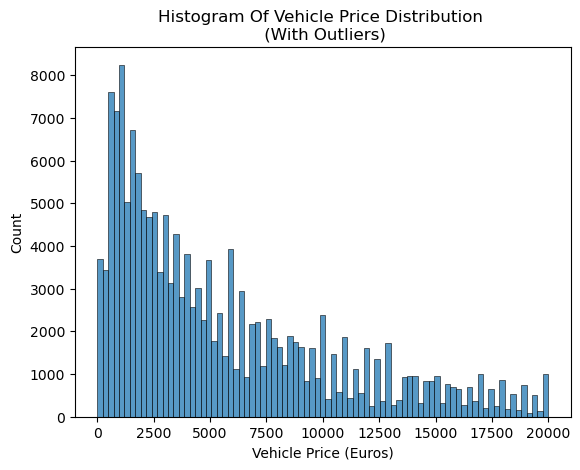

In [18]:
#Use sns.histplot() in order to make a KDE plot of the distribution of vehicle price
#amounts throughout the dataframe.
sns.histplot(df['price'])

plt.xlabel("Vehicle Price (Euros)") 

plt.title("Histogram Of Vehicle Price Distribution \n (With Outliers)")

plt.tight_layout

plt.show()


Histogram Conclusion:
According to the histogram, the vehicle price entry with highest count is: approximately 1,500 Euros with a value count of:
approximately 8,050.  The vehicle price entry witht the lowest count is: approximately: 18,000 Euros with a value count of:
approximately 100.

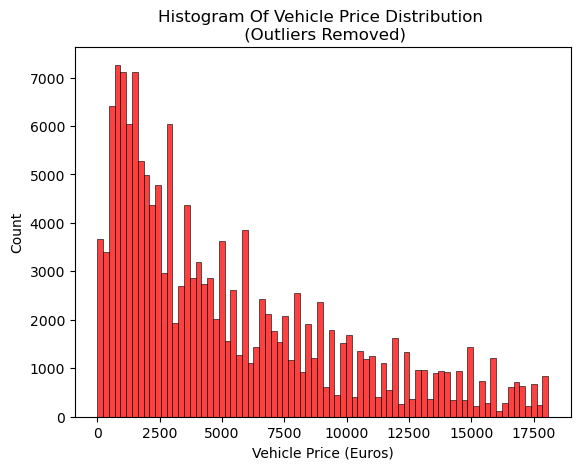

In [19]:
#Use sns.histplot() in order to make a KDE plot of the distribution of vehicle price
#amounts throughout the dataframe with outliers removed.
sns.histplot(df_price_filtered['price'], color='red')

plt.xlabel("Vehicle Price (Euros)") 

plt.title("Histogram Of Vehicle Price Distribution \n (Outliers Removed)")

plt.tight_layout

plt.show()

Histogram Conclusion:
According to the histogram, the vehicle price entry with highest count is: approximately 1,400 Euros with a value count of:
approximately 7,050.  The vehicle price entry witht the lowest count is: approximately: 16,000 Euros with a value count of:
approximately 100.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
KDE is not that helpful, so it's better to use a simple histogram. 

</div>

#### Note to Reviewer:
This is my updated histogram.

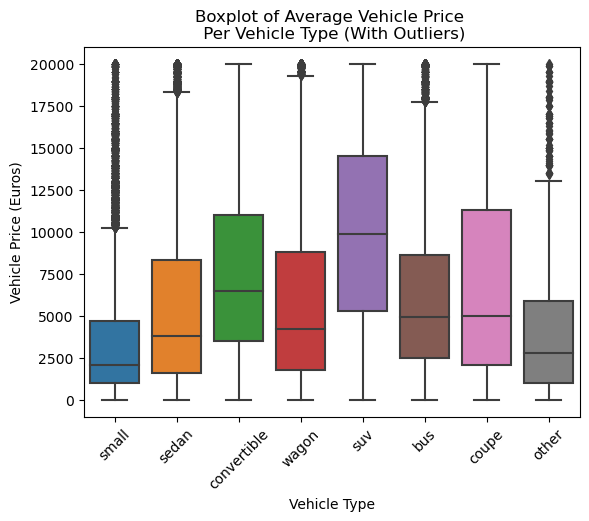

In [20]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#per vehicle type.
vehicle_type_box = sns.boxplot(x=df['vehicle_type'], y=df['price']) 

plt.xlabel('Vehicle Type') 

plt.ylabel('Vehicle Price (Euros)') 
plt.title("Boxplot of Average Vehicle Price \n Per Vehicle Type (With Outliers)")

plt.xticks(rotation=45)

plt.show()

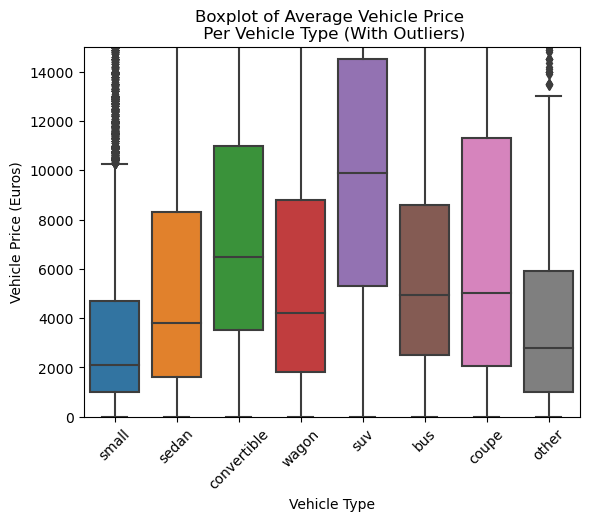

In [21]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#per vehicle type.
vehicle_type_box = sns.boxplot(x=df['vehicle_type'], y=df['price']) 

plt.xlabel('Vehicle Type') 

plt.ylabel('Vehicle Price (Euros)') 
plt.title("Boxplot of Average Vehicle Price \n Per Vehicle Type (With Outliers)")

plt.xticks(rotation=45)
plt.ylim(0, 15000)
plt.show()

Boxplot Conclusion:
According to the boxplot, the vehicle type with the highest median vehicle price value is: suv, with a median price value of: 
approximately 9,700 Euros.  The vehicle type with the lowest median price value is: small, with a median price value of: 
approximately: 2,050 Euros.

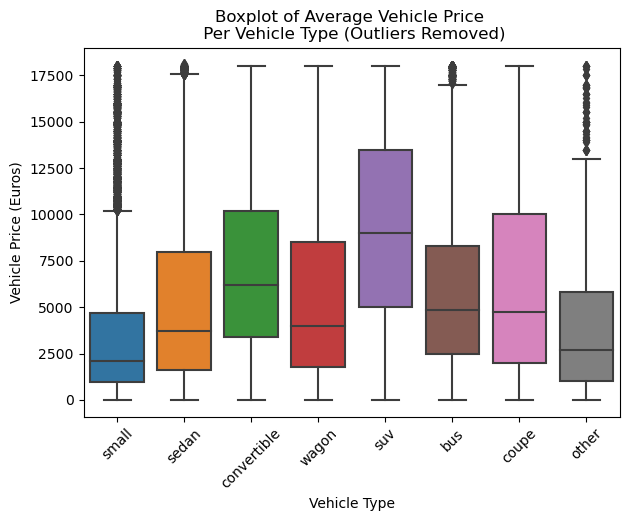

In [22]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#per vehicle type.
vehicle_type_box_or = sns.boxplot(x=df_price_filtered['vehicle_type'], y=df_price_filtered['price']) 

plt.xlabel('Vehicle Type') 

plt.ylabel('Vehicle Price (Euros)') 
plt.title("Boxplot of Average Vehicle Price \n Per Vehicle Type (Outliers Removed)")
plt.tight_layout() 

plt.xticks(rotation=45)

plt.show()

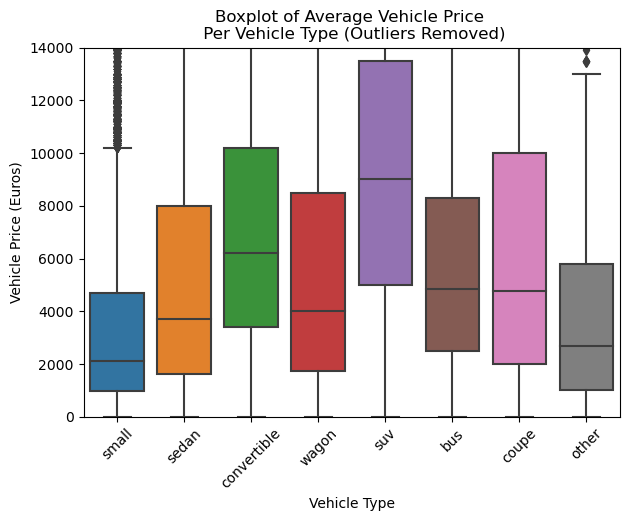

In [23]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#per vehicle type.
vehicle_type_box_or = sns.boxplot(x=df_price_filtered['vehicle_type'], y=df_price_filtered['price']) 

plt.xlabel('Vehicle Type') 

plt.ylabel('Vehicle Price (Euros)') 
plt.title("Boxplot of Average Vehicle Price \n Per Vehicle Type (Outliers Removed)")
plt.tight_layout() 

plt.xticks(rotation=45)
plt.ylim(0, 14000)
plt.show()

Chart Conclusion:
Boxplot Conclusion:
According to the boxplot, the vehicle type with the highest median vehicle price value is: suv, with a median price value of: 
approximately 9,000 Euros.  The vehicle type with the lowest median price value is: small, with a median price value of: 
approximately: 2,050 Euros.

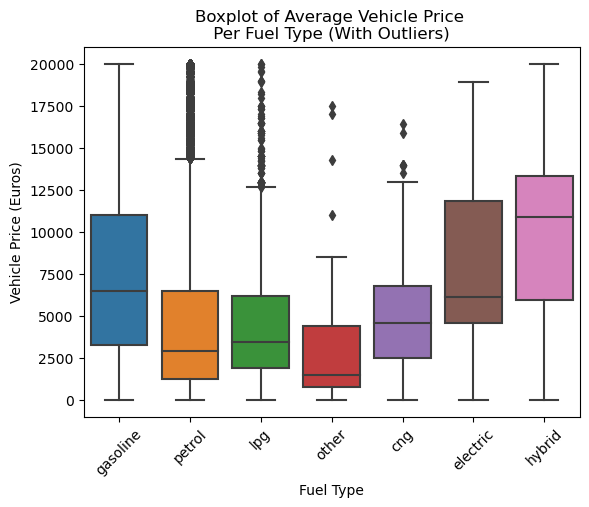

In [24]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#per fuel type.
vehicle_type_box = sns.boxplot(x=df['fuel_type'], y=df['price']) 

plt.xlabel('Fuel Type') 

plt.ylabel('Vehicle Price (Euros)') 
plt.title("Boxplot of Average Vehicle Price \n Per Fuel Type (With Outliers) ")

plt.xticks(rotation=45)
plt.show()

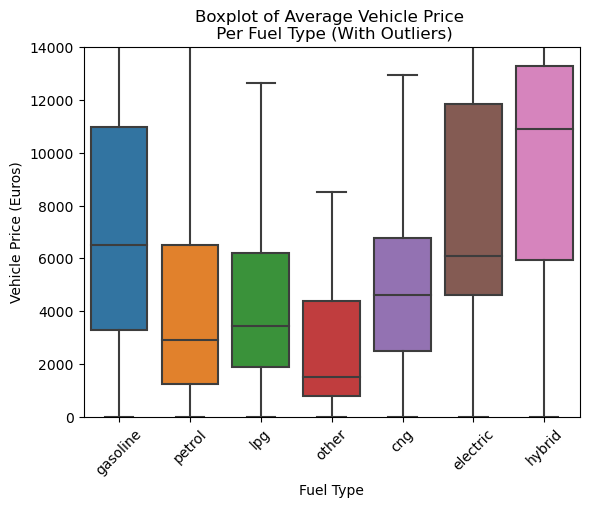

In [25]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#per fuel type.
vehicle_type_box = sns.boxplot(x=df['fuel_type'], y=df['price'], showfliers=False) 

plt.xlabel('Fuel Type') 

plt.ylabel('Vehicle Price (Euros)') 
plt.title("Boxplot of Average Vehicle Price \n Per Fuel Type (With Outliers)")

plt.ylim(0, 14000) 

plt.xticks(rotation=45)
plt.show()

Chart Conclusion:
Boxplot Conclusion:
According to the boxplot, the fuel type with the highest median vehicle price value is: hybrid, with a median price value of: 
approximately 11,000 Euros.  The fuel type with the lowest median price value is: other, with a median price value of: 
approximately: 1,700 Euros.

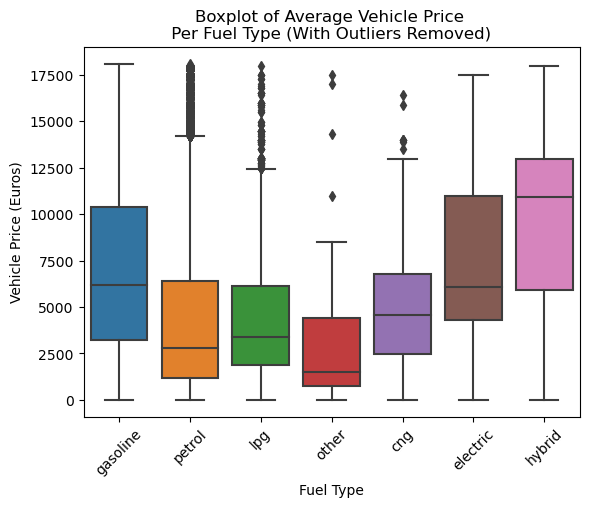

In [26]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#per fuel type.
vehicle_type_box = sns.boxplot(x=df_price_filtered['fuel_type'], y=df_price_filtered['price']) 

plt.xlabel('Fuel Type') 

plt.ylabel('Vehicle Price (Euros)') 
plt.title("Boxplot of Average Vehicle Price \n Per Fuel Type (With Outliers Removed) ")

plt.xticks(rotation=45)
plt.show()

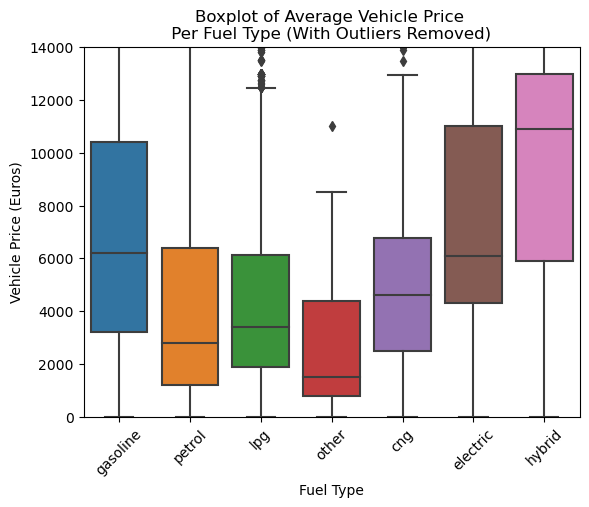

In [27]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#per fuel type.
vehicle_type_box = sns.boxplot(x=df_price_filtered['fuel_type'], y=df_price_filtered['price']) 

plt.xlabel('Fuel Type') 

plt.ylabel('Vehicle Price (Euros)') 
plt.title("Boxplot of Average Vehicle Price \n Per Fuel Type (With Outliers Removed) ")

plt.ylim(0, 14000)
plt.xticks(rotation=45)
plt.show()

Boxplot Conclusion:
According to the boxplot, the fuel type with the highest median vehicle price value is: hybrid, with a median price value of: 
approximately 11,100 Euros.  The fuel type with the lowest median price value is: other, with a median price value of: 
approximately: 1,700 Euros.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Use `\` or `\\` before the `$` character. Then `\$27` will be displayed correctly: \$27.
    
    
</div>

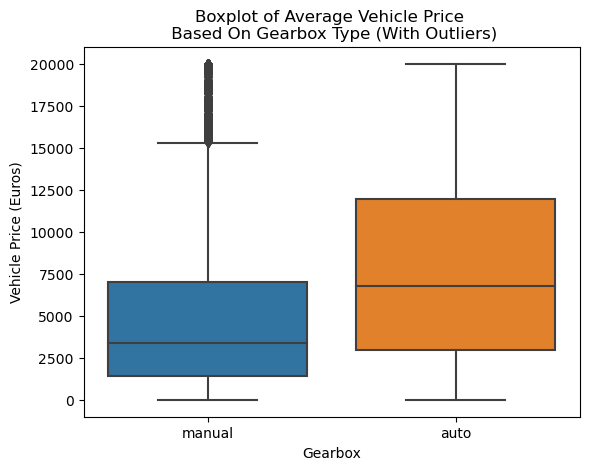

In [28]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#gearbox type.
gearbox_box = sns.boxplot(x=df['gearbox'], y=df['price']) 

plt.xlabel('Gearbox') 

plt.ylabel('Vehicle Price (Euros)') 
plt.title("Boxplot of Average Vehicle Price \n Based On Gearbox Type (With Outliers)")

plt.show()

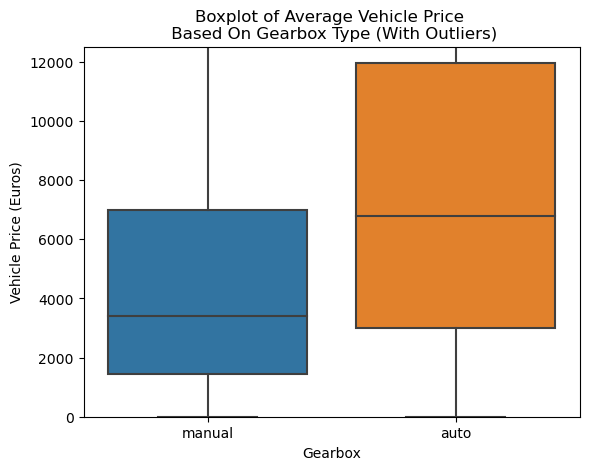

In [29]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#gearbox type.
gearbox_box = sns.boxplot(x=df['gearbox'], y=df['price']) 

plt.xlabel('Gearbox') 

plt.ylabel('Vehicle Price (Euros)') 
plt.title("Boxplot of Average Vehicle Price \n Based On Gearbox Type (With Outliers)")

plt.ylim(0, 12500)
plt.show()

Chart Conclusion:
According to the boxplot, cars with the auto gearbox type have a higher median vehicle price (approximately 6,500 Euros) 
than cars with the manual gearbox type (approximately 3,500 Euros).

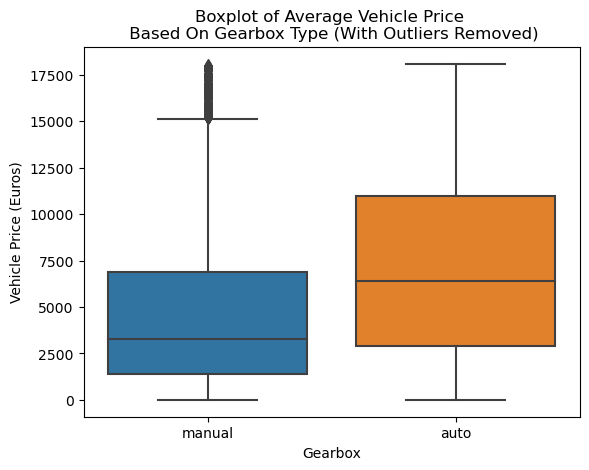

In [30]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#gearbox type.
gearbox_box = sns.boxplot(x=df_price_filtered['gearbox'], y=df_price_filtered['price']) 

plt.xlabel('Gearbox') 

plt.ylabel('Vehicle Price (Euros)') 
plt.title("Boxplot of Average Vehicle Price \n Based On Gearbox Type (With Outliers Removed)")

plt.show()

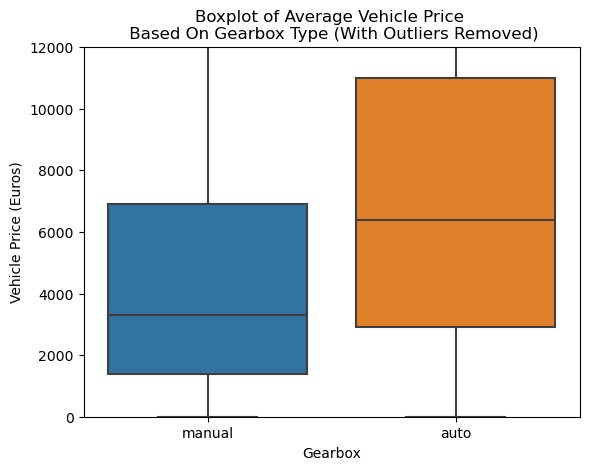

In [31]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#gearbox type.
gearbox_box = sns.boxplot(x=df_price_filtered['gearbox'], y=df_price_filtered['price']) 

plt.xlabel('Gearbox') 

plt.ylabel('Vehicle Price (Euros)') 
plt.title("Boxplot of Average Vehicle Price \n Based On Gearbox Type (With Outliers Removed)")

plt.ylim(0, 12000)
plt.show()

Chart Conclusion:
According to the boxplot, cars with the auto gearbox type have a higher median vehicle price (approximately 6,500 Euros) 
than cars with the manual gearbox type (approximately 3,100 Euros).

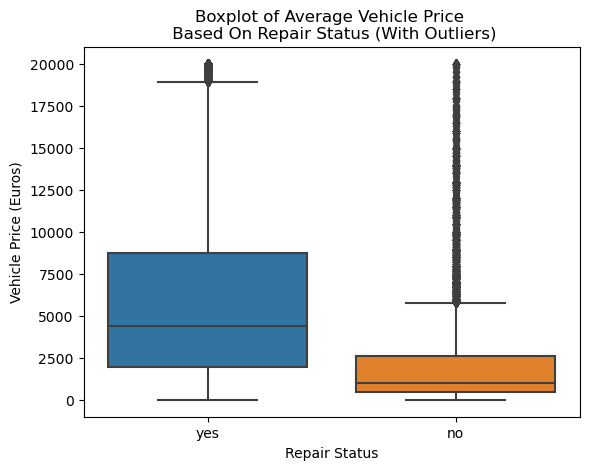

In [32]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#based on repair status.
repaired_box = sns.boxplot(x=df['repaired'], y=df['price']) 

plt.xlabel('Repair Status') 

plt.ylabel('Vehicle Price (Euros)') 
plt.title("Boxplot of Average Vehicle Price \n Based On Repair Status (With Outliers)")

plt.show()

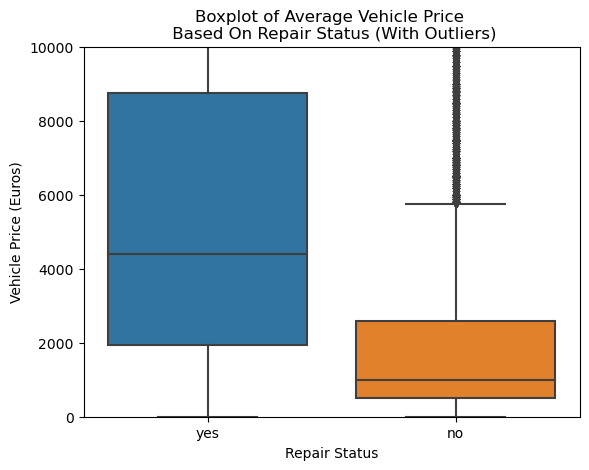

In [33]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#based on repair status.
repaired_box = sns.boxplot(x=df['repaired'], y=df['price']) 

plt.xlabel('Repair Status') 

plt.ylabel('Vehicle Price (Euros)') 
plt.title("Boxplot of Average Vehicle Price \n Based On Repair Status (With Outliers)")

plt.ylim(0, 10000)
plt.show()

Chart Conclusion:
According to the boxplot, cars with the 'yes' repaired status have a higher median vehicle price (approximately 4,500 Euros) 
than cars with the 'no' repaired status (approximately 1,000 Euros).

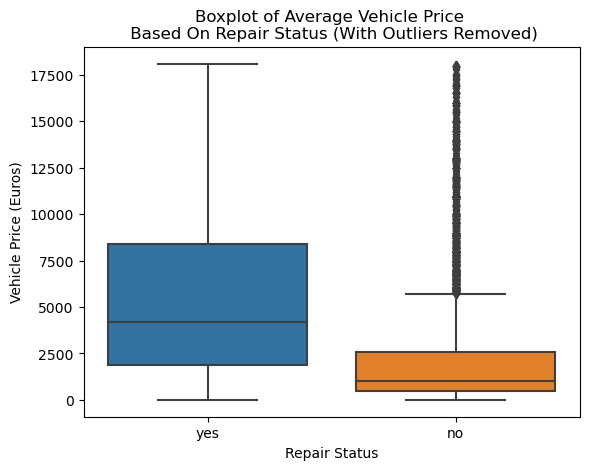

In [34]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#based on repair status.
repaired_box = sns.boxplot(x=df_price_filtered['repaired'], y=df_price_filtered['price']) 

plt.xlabel('Repair Status') 

plt.ylabel('Vehicle Price (Euros)') 
plt.title("Boxplot of Average Vehicle Price \n Based On Repair Status (With Outliers Removed)")

plt.show()

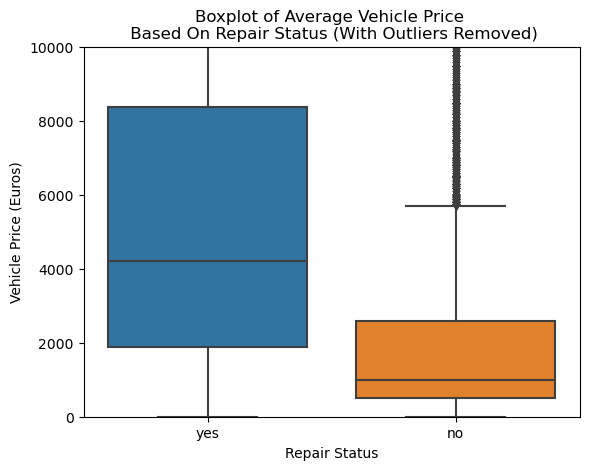

In [35]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#based on repair status.
repaired_box = sns.boxplot(x=df_price_filtered['repaired'], y=df_price_filtered['price']) 

plt.xlabel('Repair Status') 

plt.ylabel('Vehicle Price (Euros)') 
plt.title("Boxplot of Average Vehicle Price \n Based On Repair Status (With Outliers Removed)")

plt.ylim(0, 10000)
plt.show()

Chart Conclusion:
According to the boxplot, cars with the 'yes' repaired status have a higher median vehicle price (approximately 4,100 Euros) 
than cars with the 'no' repaired status (approximately 800 Euros).

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
- Are there any outliers in the data? Drop abnormal values if they exist. 



- There are irrelevant columns. Let's drop them as well to decrease the number of features. 


- After removing unnecessary columns, it makes sense to check the data for duplicates again, as the dataset will later be splitted into training and test sets. You can also check it below, after you choose the columns you are going to use. 
</div>

#### Dataframe Copy and Column Encoding

In [36]:
#Create a copy of the original dataframe by using the copy() function.
df_copy = df.copy()

In [37]:
#Use the info() method in order to check the data types in the columns of the df_copy dataframe.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161852 entries, 4 to 354367
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        161852 non-null  datetime64[ns]
 1   price               161852 non-null  int64         
 2   vehicle_type        161852 non-null  object        
 3   registration_year   161852 non-null  int64         
 4   gearbox             161852 non-null  object        
 5   power               161852 non-null  int64         
 6   model               161852 non-null  object        
 7   mileage             161852 non-null  int64         
 8   registration_month  161852 non-null  int64         
 9   fuel_type           161852 non-null  object        
 10  brand               161852 non-null  object        
 11  not_repaired        161852 non-null  object        
 12  date_created        161852 non-null  datetime64[ns]
 13  number_of_pictures  161852 non-nul

Code Result:
It appears that the last_seen column of the df_copy dataframe needs to be changed from object to datetime64 data type.
The other columns of the df_copy dataframe appear to have the appropriate data type.

In [38]:
#Convert the last_seen column in the dataframe from object to datetime data type.
df_copy['last_seen'] = pd.to_datetime(df_copy['last_seen'], errors='coerce') 

In [39]:
#Use the info() method in  double order to check the data types in the columns of the df_copy dataframe.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161852 entries, 4 to 354367
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        161852 non-null  datetime64[ns]
 1   price               161852 non-null  int64         
 2   vehicle_type        161852 non-null  object        
 3   registration_year   161852 non-null  int64         
 4   gearbox             161852 non-null  object        
 5   power               161852 non-null  int64         
 6   model               161852 non-null  object        
 7   mileage             161852 non-null  int64         
 8   registration_month  161852 non-null  int64         
 9   fuel_type           161852 non-null  object        
 10  brand               161852 non-null  object        
 11  not_repaired        161852 non-null  object        
 12  date_created        161852 non-null  datetime64[ns]
 13  number_of_pictures  161852 non-nul

Code Result:
It appears that the last_seen column of the df_copy dataframe was converted from object to datetime64
data type successfully.

In [40]:
#Use dt.days in order to extract the number of days in the last_seen and date_created columns.
df_copy['age_days'] = (df_copy['last_seen'] - df_copy['date_created']).dt.days 

#Use dt.days in order to extract the month number index in the date_crawled column.
df_copy['month_crawled'] = df_copy['date_crawled'].dt.month

#Use dt.days in order to extract the day of the week number index in the date_created column.
df_copy['dayofweek_created'] = df_copy['date_created'].dt.weekday 

In [41]:
#Use the drop() method in order to drop the appropriate columns of the df_copy dataframe.
df_copy.drop(['last_seen', 
              'date_created', 
              'date_crawled', 
              'repaired', 
              'postal_code', 
              'number_of_pictures'], 
             axis=1, 
             inplace=True)

In [42]:
#Create an index for the categorical features of the dataframe.
categorical_features = ['vehicle_type', 
                        'gearbox',
                        'model',
                        'fuel_type',
                        'brand',
                        'not_repaired'] 

#Create an index for the numerical features of the dataframe.
numerical_features = ['registration_year',
                      'power',
                      'mileage',
                      'age_days',
                      'dayofweek_created',
                      'month_crawled'] 

#Create an index for the target column of the dataframe.
target = ['price'] 

In [43]:
#Create a function that removes the outliers of the dataframe.
def remove_outliers(df):
    #Define the Q1 and Q3 quantile values using the quantile() method.
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    #Calculate the interquantile range(IQR) by subtracting Q3 from Q1.
    IQR = Q3 - Q1

    #Calculate lower and upper boundaries.
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Make a copy of the dataframe to avoid modifying the original dataframe.
    df_cleaned = df.copy()
    
    #Create a conditional statement in order to filter outliers out of the dataframe.
    mask = (df_cleaned >= lower_bound) & (df_cleaned <= upper_bound)
    #Apply the conditional statement using the all() method.
    df_cleaned = df_cleaned[mask.all(axis=1)]

    return df_cleaned

##### Dropping Outliers from Numerical Features And Target Columns

Rationale:
I will drop the outliers from the target and numerical features columns in order to reduce noise in the 
dataset and to provide more accurate predicitons.

In [44]:
#Create a dataframe that only consists of the numerical features and target columns that will be
#use in order to remove outliers.
cleaning_df = df_copy[numerical_features + target]

#Use the remove_outlier() funciton in order to remove outliers from the cleaning_df dataframe.S
df_cleaned = remove_outliers(cleaning_df) 

#Create a dataframe that only consists of the categorical feature columns.S
categorical_df = df_copy[categorical_features]

##### Non Encoded Dataframe

Rationale:
I will create a dataframe where the categorical features are not encoded that will be used to in order train and make predictions 
on the CatBoost Regressor and Light GBM Regressor models, which both have built in encoding options. 

In [45]:
#Use the pd.concat() method in order to concatenate the df_cleaned and categorical_df dataframes.
not_encoded_df = pd.concat([df_cleaned, categorical_df.reset_index(drop=True)], axis=1)

In [46]:
#Use the isna() and sum() methods in order to check for missing values in the not_encoded_df dataframe.
not_encoded_df.isna().sum()

registration_year    118252
power                118252
mileage              118252
age_days             118252
dayofweek_created    118252
month_crawled        118252
price                118252
vehicle_type          51447
gearbox               51447
model                 51447
fuel_type             51447
brand                 51447
not_repaired          51447
dtype: int64

Code Results: 
It appears that there are several missing values in the columns of the  not_encoded_df dataframe.  These missing values will be dropped.

In [47]:
#Use the dropna() method in order to drop missing values from the not_encoded_df dataframe.
not_encoded_df.dropna(inplace=True) 

#Use the isna() and sum() methods in order to double check for missing values in the not_encoded_df dataframe.
not_encoded_df.isna().sum()

registration_year    0
power                0
mileage              0
age_days             0
dayofweek_created    0
month_crawled        0
price                0
vehicle_type         0
gearbox              0
model                0
fuel_type            0
brand                0
not_repaired         0
dtype: int64

Code Result:
It appears that there are no more missing values in the not_encoded_df dataframe.  The missing values were successfully dropped.

In [48]:
#Use the duplicated() and sum() methods in order to check for duplicate values in the not_encoded_df dataframe.
not_encoded_df.duplicated().sum()

0

Code Results: 
It appears that there are 15 duplicate values in the not_encoded_df dataframe.  These duplicated values will be dropped.

In [49]:
#Use the drop_duplicates() method in order to drop duplicate values in the not_encoded_df dataframe.
not_encoded_df.drop_duplicates(inplace=True) 

#Use the duplicated() and sum() methods in order to double check for duplicate values in the not_encoded_df dataframe.
not_encoded_df.duplicated().sum()

0

Code Result:
It appears that there are no more duplicate values in the not_encoded_df dataframe.  The duplicate values were successfully dropped.

##### Encoded Dataframe

In [50]:
#Create and encoder using OneHotEncoder().
encoder = OneHotEncoder(sparse_output=False, drop='first') 

#Use the fit_transform() method in order to generate an encoded array from the column values in the
#categorical_df dataframe.
encoded_array = encoder.fit_transform(categorical_df) 

#Use the pd.DataFrame() method in order to create a dataframe from encoded_array.
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_df.columns))

In [51]:
#Use the pd.concat() method in order to concatenate the df_cleaned and encoded_df dataframes.
final_df = pd.concat([df_cleaned, encoded_df.reset_index(drop=True)], axis=1)

In [52]:
#Use the isna() and sum() methods in order to check for missing values in the final_df dataframe.
final_df.isna().sum()

registration_year    118252
power                118252
mileage              118252
age_days             118252
dayofweek_created    118252
                      ...  
brand_toyota          51447
brand_trabant         51447
brand_volkswagen      51447
brand_volvo           51447
not_repaired_yes      51447
Length: 307, dtype: int64

Code Result:
It appears that there are several missing values noted in the final_df dataframe.  These missing values will be dropped.

In [53]:
#Use the dropna() method in order to drop missing values in the final_df dataframe.
final_df.dropna(inplace=True) 

#Use the isna() and sum() methods in order to double check for missing values in the final_df dataframe.
final_df.isna().sum()

registration_year    0
power                0
mileage              0
age_days             0
dayofweek_created    0
                    ..
brand_toyota         0
brand_trabant        0
brand_volkswagen     0
brand_volvo          0
not_repaired_yes     0
Length: 307, dtype: int64

Code Result:
It appears that there are no longer any missing values noted in the final_df dataframe.  The missing values were
successfully dropped.

In [54]:
#Use the duplicated() and sum() methods in order to check for duplicate values in the final_df dataframe. 
final_df.duplicated().sum()

0

Code Result:
It appears that there are 22 duplicate values noted in the final_df dataframe.  These duplicate values will be dropped.

In [55]:
#Use the drop_duplicates() method in order to drop duplicate values in the not_encoded_df dataframe. 
final_df.drop_duplicates(inplace=True) 

#Use the duplicated() and sum() methods in order to double check for duplicate values in the final_df dataframe.
final_df.duplicated().sum()

0

Code Result:
There are no longer any missing values noted in the final_df dataframe.  The missing values were successfully dropped.


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
`get_dummies` increases data size as it converts categorical features into multiple binary columns, which makes the training process more complex and time-consuming. Additionally, such encoding loses the relationships between categories if it exists. So we should not use it with the tree-based models, since it significantly increases the number of features and computational cost. Instead, try to use  `OneHotEncoder()`  from sklearn or `OrdinalEncoder()`. What is more, `OneHotEncoder()` handles situations where test subset has features that were not available during training. [Difference between OneHotEncoder and get_dummies](https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/).

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

    
- For boosting algorithms, we can rely on internal encoders that usually perform even better than external ones. For `CatBoost`, this is controlled by the `cat_features` parameter. For `LightGBM`, you can convert categorical features to the category type, allowing the model to handle them automatically.



- Please note that `OrdinalEncoder()` or `LabelEncoder()` should not be used with linear models if there's no ordinal relationship. [How and When to Use Ordinal Encoder](https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c).</div>

## Model training

In [56]:
#Create seed for the random state.
seed = 12345 

#Use the np.random.RandomState() method in order to create a random state for the models.
state = np.random.RandomState(seed)

In [57]:
#Create a function in order to calculate the rmse for each model.
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred)) 

#Use the make_scorer() function to create a scorer for the GridSearch and RandomizedSearch models using the rmse
#metric.  Set the greater_is_better parameter to False.
rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [58]:
#Set the price column as the target.
X_not_encoded = not_encoded_df.drop(['price'], axis=1)
y_not_encoded = not_encoded_df['price']
#Use the train_test_split method to split the features and the target datasets into training
#and test sets using a 70:30 ratio.
X_ne_train, X_ne_test, y_ne_train, y_ne_test = train_test_split(X_not_encoded, y_not_encoded, test_size=0.3, random_state=state) 

In [59]:
#Use StandardScaler() to scale the numerical features in the features test and training sets.
scaler_ne = StandardScaler() 
X_ne_train[numerical_features] = scaler_ne.fit_transform(X_ne_train[numerical_features])
X_ne_test[numerical_features] = scaler_ne.transform(X_ne_test[numerical_features])

In [60]:
#Set the price column as the target.
X = final_df.drop(['price'], axis=1)
y = final_df['price']
#Use the train_test_split method to split the features and the target datasets into training
#and test sets using a 70:30 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=state) 

In [61]:
#Use StandardScaler() to scale the numerical features in the features test and training sets.
scaler = StandardScaler() 
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Why did you decide to drop columns such as brand, model, vehicle_type, repaired and fuel type?
</div>

#### Note to Reviewer:
This is my correction of my code.

In [62]:
#Use the np.mean() method in order to get the mean for the training set of the target dataset.
y_mean_pred = np.mean(y_train)
#Use the rmse() function to calculate the rmse of between the training set of the target dataset and 
#the product of the mean for the training set of the target dataset and the length the of the
#training set of target datset. This will be the baseline rmse for the dataset.
baseline_rmse = rmse(y_train, [y_mean_pred] * len(y_train))

In [63]:
#Use np.mean() in order order to get the mean value of the price column of the dataframe.
price_mean = np.mean(df_copy['price']) 

#Create a function that calculates the RMSE error percentage.
def rmse_percentage(model_rmse, y_mean):
    percentage = (model_rmse / y_mean) * 100
    return percentage

#Print the Baseline RMSE.
print(f"Baseline RMSE (Training Set): {baseline_rmse}")
#Print Basline RMSE error percentage.
print(f"Baseline RMSE Error Perecentage (Training Set): {rmse_percentage(baseline_rmse, price_mean):.2f} %")

Baseline RMSE (Training Set): 4455.900229726534
Baseline RMSE Error Perecentage (Training Set): 80.65 %


#### Linear Regression Model

In [64]:
#Create the a Linear Regression model using the LinearRegression() class.
lr = LinearRegression()

#Use the time.time() function in order to calculate the start time for the model's
#training process.
lr_st = time.time()
#Use the fit() method in order to train the model with the training sets of the 
#scaled features dataset and target datasets.
lr.fit(X_train, y_train) 
#Use the time.time() function in order to calculate the end time for the model's
#training process.
lr_et = time.time()
#Calculate the model's total training time by subtracting the end time from the start time.
lr_time = lr_et - lr_st 

#Print the model's total training time.
print(f"Linear Regression Model Training Time {lr_time} seconds")

Linear Regression Model Training Time 1.194411277770996 seconds


In [65]:
#Use the time.time() function in order to calculate the start time for the model's
#prediction process.
lr_pred_st = time.time()
#Use the predict() method in order to make a prediciton based on the training set of the scaled
#features dataset using the Linear Regeression model.
lr_predicted = lr.predict(X_train) 
#Use the time.time() function in order to calculate the end time for the model's
#prediction process.
lr_pred_et = time.time()
#Calculate the model's total prediction time by subtracting the end time from the start time.
lr_pred_time = lr_pred_et = lr_pred_st

#Print the model's total training time.
print(f"Linear Regression Model Prediction Time {lr_pred_time} seconds")

#Use the rmse() method in order to print the rmse between the training set of the target dataset
#and the model's predicted values.
lr_rmse = rmse(y_train, lr_predicted) 
#Print the model's RMSE.
print(f"Linear Regression Model RMSE {lr_rmse}")
#Print the model's RMSE Serror percentage.
print(f"Linear Regressor RMSE Error Percentage: {rmse_percentage(lr_rmse, price_mean):.2f} %")

Linear Regression Model Prediction Time 1742332613.865962 seconds
Linear Regression Model RMSE 2695.1616266137316
Linear Regressor RMSE Error Percentage: 48.78 %


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Please don't use test subset until you move on to the final test. We first train and tune all models, then we identify the best model (or two models if their metrics are similar), and then we run the final test using the test subset. So we do it once in the project.     
    
</div>

#### SGD Linear Regression Model

In [66]:
#Create a class for a Stochastic Gradient Descent Linear Regression model.
class SGDLinearRegression:
    #Initialize the self paramter and the: step_size, epochs, batch_size, and reg_weight hyperparameters
    def __init__(self, step_size, epochs, batch_size, reg_weight):
        self.step_size = step_size
        self.epochs = epochs
        self.batch_size = batch_size
        self.reg_weight = reg_weight
    
    #Create the fit() function to train the model.
    def fit(self, train_features, train_target):
        X = np.concatenate(
            (np.ones((train_features.shape[0], 1)), train_features), axis=1
        )
        y = train_target
        w = np.zeros(X.shape[1])
        
        #Create a for loop to calculate the number of epochs and batches need for the model's
        # weigh calculation.
        for _ in range(self.epochs):
            batches_count = X.shape[0] // self.batch_size
            for i in range(batches_count):
                begin = i * self.batch_size
                end = (i + 1) * self.batch_size
                X_batch = X[begin:end, :]
                y_batch = y[begin:end]
                
                #Calculate the gradient.
                gradient = (
                    2
                    * X_batch.T.dot(X_batch.dot(w) - y_batch)
                    / X_batch.shape[0]
                )
								
                #Calculate the regularization weight.
                reg = 2 * w.copy()
                reg[0] = 0
                #Multiply the gradient by the regularization weight,
                gradient +=  self.reg_weight * reg
                #Subtract the product of the step size the gradient(with regularization)
                #from the weight.
                w -= self.step_size * gradient
                
        #Create a variable for the calculated weights without bias.
        self.w = w[1:]
        #Create a variable for the calculated weights with bias.
        self.w0 = w[0]
    
    #Create the predict() method in order to calculate predicted values using the model.
    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Nice code! </div>

In [67]:
#Use the SGDLinearRegression() method in order to create an SGD Linear Regression model with 
#default hyperparameters.  The model's hyperparameters will be tuned using GridSearch.
sgd = SGDLinearRegression(step_size=0.01, epochs=10, batch_size=100, reg_weight=0.0)

In [68]:
#Create a parameter grid for the SGD Linear Regression model.
sgd_param_grid = {
    'step_size': [0.001, 0.05],
    'epochs': [50, 100],
    'batch_size': [50, 100],
    'reg_weight': [0.001, 0.1]
}

In [69]:
#Create a class named SGDLinearRegressionWrapped that contains the wrapped version of the SGDLinearRegression model
#in order to make the model more compatible with GridSearch.
class SGDLinearRegressionWrapped(BaseEstimator, RegressorMixin):
    def __init__(self, step_size=0.01, epochs=10, batch_size=100, reg_weight=0.0):
        self.step_size = step_size 
        self.epochs = epochs 
        self.batch_size = batch_size 
        self.reg_weight = reg_weight 
        self.model = SGDLinearRegression(step_size, epochs, batch_size, reg_weight) 
        
    def fit(self, X, y):
        self.model.fit(X, y) 
        
    def predict(self, X):
        self.model.predict(X)

In [70]:
#Create wrapped model for the SGD Linear Regression model for GridSearch.
sgd_wrapped = SGDLinearRegressionWrapped()

In [71]:
#Create a GridSearch model for the SGD Linear Regression model.
sgd_gsearch = GridSearchCV(estimator=sgd_wrapped,
                           param_grid=sgd_param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring=rmse_scorer) 
#Use the fit() method in order to train the GridSearch model with the training sets of the 
#scaled features dataset and target datasets.
sgd_gsearch.fit(X_train, y_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=SGDLinearRegressionWrapped(), n_jobs=-1,
             param_grid={'batch_size': [50, 100], 'epochs': [50, 100],
                         'reg_weight': [0.001, 0.1],
                         'step_size': [0.001, 0.05]},
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
You have successfully implemented hyperparameters tuning, well done!     
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
The issue should be fixed when you use the correct encoder.</div>

In [72]:
#Use the best_score_ method in order to get the best score for the model.
sgd_bscore = sgd_gsearch.best_score_
#Use the best_params_ method in order to get the best score for the model.
sgd_bparams = sgd_gsearch.best_params_  

#Print the SGD Linear Regression Model's Best Score.
print(f"SGD Linear Regression Best Score: {sgd_bscore}")
#Print the SGD Linear Regression Model's Best Hyperparameters.
print(f"SGD Linear Regression Model Best Hyperparameters: \n{sgd_bparams}")

SGD Linear Regression Best Score: nan
SGD Linear Regression Model Best Hyperparameters: 
{'batch_size': 50, 'epochs': 50, 'reg_weight': 0.001, 'step_size': 0.001}


In [73]:
#Create an SGD Linear Regression model using the SGDLinearRegression() class with tuned hyperparameters.
sgd = SGDLinearRegression(batch_size=50, epochs=50, reg_weight=0.001, step_size=0.001) 

#Use the time.time() function in order to calculate the start time for the model's
#training process.
sgd_st = time.time()
#Use the fit() method in order to train the model with the training sets of the 
#scaled features dataset and target datasets. 
sgd.fit(X_train, y_train) 
#Use the time.time() function in order to calculate the end time for the model's
#training process.
sgd_et = time.time()
#Calculate the model's total training time by subtracting the end time from the start time. 
sgd_time = sgd_et - sgd_st

#Print the model's total training time.
print(f"SGD Linear Regression Training Time {sgd_time} seconds")

SGD Linear Regression Training Time 11.661406517028809 seconds


In [74]:
#Use the time.time() function in order to calculate the start time for the model's
#prediction process. 
sgd_pred_st = time.time()
#Use the predict() method in order to make a prediciton based on the training set of the scaled
#features dataset using the SGD Linear Regeression model. 
sgd_predicted = sgd.predict(X_train) 
#Use the time.time() function in order to calculate the end time for the model's
#prediction process.
sgd_pred_et = time.time() 
#Calculate the model's total prediction time by subtracting the end time from the start time. 
sgd_pred_time = sgd_pred_et - sgd_pred_st

#Print the model's total training time.
print(f"SGD Prediction Time {sgd_pred_time} seconds")

#Use the rmse() method in order to print the rmse between the training set of the target dataset
#and the model's predicted values. 
sgd_rmse = rmse(y_train, sgd_predicted) 
#Print the model's RMSE.
print(f"SGD Linear Regression RMSE: {sgd_rmse}")
#Print the model's RMSE Serror percentage.
print(f"SGD Linear Regression RMSE Error Percentage: {rmse_percentage(sgd_rmse, price_mean):.2f} %")

SGD Prediction Time 0.05984187126159668 seconds
SGD Linear Regression RMSE: 2707.4005311095607
SGD Linear Regression RMSE Error Percentage: 49.00 %


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Here and further, please don't use test subset. Calculate RMSE on training data please. 
</div>

#### Decision Tree Regressor Model

In [75]:
#Use DecisionTreeRegressor() to create a Decision Tree Regressor model.
dt_regressor = DecisionTreeRegressor(random_state=state)

In [76]:
#Create a parameter grid for the Decision Tree Regressor's Gridsearch Model.
dtr_param_grid = {
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
} 

#Create a GridSearch Model for the Decision Tree Regressor model.
dtr_gsearch = GridSearchCV(estimator=dt_regressor,
                           param_grid=dtr_param_grid, 
                           cv=5, n_jobs=-1, 
                           scoring=rmse_scorer)

#Use the fit() method in order to train the GridSearch model with the training sets of the 
#scaled features dataset and target datasets.
dtr_gsearch.fit(X_train, y_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(random_state=RandomState(MT19937) at 0x27E0635F640),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

In [77]:
#Print the Decision Tree Regressor Model's Best Score.
print(f"Descision Tree Regressor Best Score:{dtr_gsearch.best_score_}") 
#Print the Decision Tree Regressor Model's Best Hyperparameters.
print(f"Decision Tree Regressor Best HyperParameters: \n{dtr_gsearch.best_params_}")

Descision Tree Regressor Best Score:-3001.0371898750936
Decision Tree Regressor Best HyperParameters: 
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}


In [78]:
#Recreate the Decision Tree Regressor Model with tuned hyperparameters.
dtr = DecisionTreeRegressor(max_depth=None, 
                            max_features='sqrt',
                            min_samples_leaf=2,
                            min_samples_split=2,
                            random_state=state)

#Use the time.time() function in order to calculate the start time for the model's
#training process.
dt_st = time.time()

#Use the fit() method in order to train the model with the training sets of the 
#scaled features dataset and target datasets. 
dtr.fit(X_train, y_train) 

#Use the time.time() function in order to calculate the end time for the model's
#training process.
dt_et = time.time() 

#Calculate the model's total training time by subtracting the end time from the start time. 
dt_training_time = dt_et - dt_st

#Print the model's total training time.
print(f"Decision Tree Regressor Training Time {dt_training_time} seconds")

Decision Tree Regressor Training Time 0.517615556716919 seconds


In [79]:
#Use the time.time() function in order to calculate the start time for the model's
#prediction process. 
dt_pred_st = time.time()

#Use the predict() method in order to make a prediciton based on the test set of the scaled
#features dataset using the  model. 
dtr_predicted = dtr.predict(X_train) 

#Use the time.time() function in order to calculate the end time for the model's
#prediction process.
dt_pred_et = time.time() 

#Calculate the model's total prediction time by subtracting the end time from the start time. 
dt_pred_time = dt_pred_et = dt_pred_st 
#Print the model's total prediction time.
print(f"Decision Tree Regressor Prediction Time: {dt_pred_time} seconds")

#Use the rmse() method in order to print the rmse between the training set of the target dataset
#and the model's predicted values. 
dtr_rmse = rmse(y_train, dtr_predicted)
#Print the model's RMSE.
print(f"Decision Tree Regressor RMSE: {dtr_rmse}")
#Print the model's RMSE error percentage.
print(f"Decision Tree Regressor Error Percentage: {rmse_percentage(dtr_rmse, price_mean):.2f} %")

Decision Tree Regressor Prediction Time: 1742332716.896972 seconds
Decision Tree Regressor RMSE: 2453.880494370194
Decision Tree Regressor Error Percentage: 44.41 %


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Same issue. </div>

#### Random Forest Regressor Model

In [80]:
#Use RandomForestRegressor() to create a Random Forest Regressor Model.
rfr = RandomForestRegressor(random_state=state) 

In [81]:
#Create a paramter grid for the Random Forest Regressor Model's GridSearch.
rfr_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

In [82]:
#Create a GridSearch Model for the Random Forest Regressor model.
rfr_gsearch = GridSearchCV(estimator=rfr,
                           param_grid=rfr_param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring=rmse_scorer) 

#Use the fit() method in order to train the GridSearch model with the training sets of the 
#scaled features dataset and target datasets.
rfr_gsearch.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(random_state=RandomState(MT19937) at 0x27E0635F640),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'),
             verbose=2)

In [83]:
#Use the best_score_ method in order to get the best score for the model. 
print(f"Random Forest Regressor Model Best Score: {rfr_gsearch.best_score_}") 
#Use the best_params_ method in order to get the best score for the model.
print(f"Random Forest Regressor Model Best Hyperparameters: \n{rfr_gsearch.best_params_}")

Random Forest Regressor Model Best Score: -2232.60554963709
Random Forest Regressor Model Best Hyperparameters: 
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [84]:
#Recreate the Random Forest Regressor Model with tuned hyperparameters.
rfr = RandomForestRegressor(max_depth=None,
                            max_features='sqrt',
                            min_samples_leaf=1,
                            min_samples_split=2,
                            n_estimators=100, 
                            random_state=state) 

#Use the time.time() function in order to calculate the start time for the model's
#training process.
rf_st = time.time()

#Use the fit() method in order to train the model with the training sets of the 
#scaled features dataset and target datasets. 
rfr.fit(X_train, y_train) 

#Use the time.time() function in order to calculate the end time for the model's
#training process.
rf_et = time.time() 
#Calculate the model's total training time by subtracting the end time from the start time. 
rf_time = rf_et - rf_st

#Print the model's total training time.
print(f"Random Forest Regressor Training Time: {rf_time} seconds")

Random Forest Regressor Training Time: 23.05044460296631 seconds


In [85]:
#Use the time.time() function in order to calculate the start time for the model's
#prediction process. 
rf_pred_st = time.time()

#Use the predict() method in order to make a prediciton based on the training set of the scaled
#features dataset using the  model. 
rfr_predicted = rfr.predict(X_train) 

#Use the time.time() function in order to calculate the end time for the model's
#prediction process.
rf_pred_et = time.time()
#Calculate the model's total prediction time by subtracting the end time from the start time. 
rf_pred_time = rf_pred_et - rf_pred_st

#Print the model's total prediction time.
print(f"Random Forest Regressor Prediction Time: {rf_pred_time} seconds")

#Use the rmse() method in order to print the rmse between the training set of the target dataset
#and the model's predicted values. 
rfr_rmse = rmse(y_train, rfr_predicted)
#Print the model's RMSE.
print(f"Random Forest Regressor RMSE: {rfr_rmse}")
#Print the model's RMSE Serror percentage.
print(f"Random Forest Regressor RMSE Error Percentage: {rmse_percentage(rfr_rmse, price_mean):.2f} %")

Random Forest Regressor Prediction Time: 1.996385097503662 seconds
Random Forest Regressor RMSE: 834.5984412318762
Random Forest Regressor RMSE Error Percentage: 15.11 %


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Same issue. </div>

#### XG Boost Regressor Model

In [86]:
#Use XGBRegressor() in order to create an XG Boost Regressor Model.
xgbr = XGBRegressor(random_state=state) 

In [87]:
#Create a paramter grid for the  Regressor Model's GridSearch.
xgbr_param_grid = {
    'n_estimators': [100, 200],  
    'learning_rate': [0.1],  
    'max_depth': [3, 4],  
}

In [88]:
#Create a GridSearch Model for the XG Boost Regressor model.
xgbr_gsearch = GridSearchCV(estimator=xgbr, 
                           param_grid=xgbr_param_grid, 
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring=rmse_scorer) 

#Use the fit() method in order to train the GridSearch model with the training sets of the 
#scaled features dataset and target datasets.
xgbr_gsearch.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=1047315497, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 4],
                         'n_estimators': [100, 200]},
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'),
             verbose=2)

In [89]:
#Use the best_score_ method in order to get the best score for the model. 
print(f"XG Boost Regressor Best Score: {xgbr_gsearch.best_score_}")
#Use the best_params_ method in order to get the best score for the model.
print(f"XG Boost Regressor Best Hyperparameters: {xgbr_gsearch.best_params_}")

XG Boost Regressor Best Score: -2066.9678238052334
XG Boost Regressor Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


In [90]:
#Recreate the XG Boost Regressor Model with tuned hyperparameters.
xgb = XGBRegressor(learning_rate=0.1, 
                       max_depth=4, 
                       n_estimators=200, 
                       random_state=state) 

 #Use the time.time() function in order to calculate the start time for the model's
#training process.                     
xgb_st = time.time() 

#Use the fit() method in order to train the model with the training sets of the 
#scaled features dataset and target datasets. 
xgb.fit(X_train, y_train) 

#Use the time.time() function in order to calculate the end time for the model's
#training process.
xgb_et = time.time() 

#Calculate the model's total training time by subtracting the end time from the start time. 
xgb_time = xgb_et - xgb_st 

#Print the model's total training time.
print(f"XG Boost Regressor Training Time {xgb_time} seconds")

XG Boost Regressor Training Time 3.3068480491638184 seconds


In [91]:
#Use the time.time() function in order to calculate the start time for the model's
#prediction process. 
xgb_pred_st = time.time()

#Use the predict() method in order to make a prediciton based on the training set of the scaled
#features dataset using the  model. 
xgb_predicted = xgb.predict(X_train) 

#Use the time.time() function in order to calculate the end time for the model's
#prediction process.
xgb_pred_et = time.time()
#Calculate the model's total prediction time by subtracting the end time from the start time. 
xgb_pred_time = xgb_pred_et - xgb_pred_st 
#Print the model's total prediction time.
print (f"XG Boost Regressor Prediction Time: {xgb_pred_time} seconds")

#Use the rmse() method in order to print the rmse between the training set of the target dataset
#and the model's predicted values. 
xgb_rmse = rmse(y_train, xgb_predicted) 
#Print the model's RMSE.
print(f"XG Boost Regressor RMSE: {xgb_rmse}")
#Print the model's RMSE Serror percentage.
print(f"XG Boost Regressor RMSE Error Percentage: {rmse_percentage(xgb_rmse, price_mean):.2f} %")

XG Boost Regressor Prediction Time: 0.34650635719299316 seconds
XG Boost Regressor RMSE: 1955.2358854199456
XG Boost Regressor RMSE Error Percentage: 35.39 %


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Same issue. </div>

#### CatBoost Regressor Model

In [92]:
#Use CatBoostRegressor() to create a CatBoost Regressor Model.
cbr = CatBoostRegressor(random_seed=state, verbose=0)

In [93]:
#Create a paramter grid for the CatBoost Regressor Model's GridSearch.
cb_param_grid = {
    'depth': [4, 6],
    'learning_rate': [0.1],
    'iterations': [100, 200],
    'random_seed': [42],
    'metric_period': [50, 100]
}

In [94]:
#Create a GridSearch Model for the CatBoost Regressor model.
cbr_gsearch = GridSearchCV(estimator=cbr, 
                           param_grid=cb_param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           scoring=rmse_scorer)

#Use the fit() method in order to train the GridSearch model with the training sets of the 
#scaled features dataset and target datasets.
cbr_gsearch.fit(X_ne_train, y_ne_train, cat_features=categorical_features)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000027E071CD690>,
             n_jobs=-1,
             param_grid={'depth': [4, 6], 'iterations': [100, 200],
                         'learning_rate': [0.1], 'metric_period': [50, 100],
                         'random_seed': [42]},
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

In [95]:
#Use the best_score_ method in order to get the best score for the model. 
print(f"CatBoostRegressor Best Score: {cbr_gsearch.best_score_}") 
#Use the best_params_ method in order to get the best score for the model.
print(f"CatBoostRegressor Best Hyperparameters: \n{cbr_gsearch.best_params_}")

CatBoostRegressor Best Score: -2064.621217852168
CatBoostRegressor Best Hyperparameters: 
{'depth': 6, 'iterations': 200, 'learning_rate': 0.1, 'metric_period': 50, 'random_seed': 42}


In [96]:
#Recreate the CatBoost Regressor Model with tuned hyperparameters.
cbr = CatBoostRegressor(depth=6, iterations=200, learning_rate=0.1, metric_period=50, random_seed=seed, cat_features=categorical_features) 

#Use the time.time() function in order to calculate the start time for the model's
#training process.
cbr_st = time.time() 

#Use the fit() method in order to train the model with the training sets of the 
#scaled features dataset and target datasets. 
cbr.fit(X_ne_train, y_ne_train) 

#Use the time.time() function in order to calculate the end time for the model's
#training process.
cbr_et = time.time() 

#Calculate the model's total training time by subtracting the end time from the start time. 
cbr_time = cbr_et - cbr_st 

#Print the model's total training time.
print(f"CatBoost Regressor Training Time: {cbr_time} Seconds")

0:	learn: 4178.3554588	total: 46.4ms	remaining: 9.23s
50:	learn: 2074.4199929	total: 2.19s	remaining: 6.41s
100:	learn: 2047.3047350	total: 4.12s	remaining: 4.04s
150:	learn: 2016.6221052	total: 6.28s	remaining: 2.04s
199:	learn: 1995.3387986	total: 8.22s	remaining: 0us
CatBoost Regressor Training Time: 8.436385154724121 Seconds


In [97]:
#Use the time.time() function in order to calculate the start time for the model's
#prediction process. 
cbr_pred_st = time.time()

#Use the predict() method in order to make a prediciton based on the training set of the scaled
#features dataset using the  model. 
cbr_predicted = cbr.predict(X_ne_train) 

#Use the time.time() function in order to calculate the end time for the model's
#prediction process.
cbr_pred_et = time.time()
#Calculate the model's total prediction time by subtracting the end time from the start time.
cbr_pred_time = cbr_pred_et - cbr_pred_st
#Print the model's total prediction time.
print(f"CatBoost Regressor Prediction Time: {cbr_pred_time}") 

#Use the rmse() method in order to print the rmse between the training set of the target dataset
#and the model's predicted values. 
cbr_rmse = rmse(y_ne_train, cbr_predicted)
#Print the model's RMSE.
print(f"CatBoost Regressor Model RMSE {cbr_rmse}")
#Print the model's RMSE Serror percentage.
print(f"CatBoost Regressor RMSE Error Percentage: {rmse_percentage(cbr_rmse, price_mean):.2f} %")

CatBoost Regressor Prediction Time: 0.1366264820098877
CatBoost Regressor Model RMSE 2005.0507099784602
CatBoost Regressor RMSE Error Percentage: 36.29 %


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Same issue. </div>

#### LightGBM Model

In [98]:
#Use LGMRegressor() to create a Light GBM Regressor Model.
lgb = LGBMRegressor(random_state=state)

In [99]:
#Create a paramter grid for the Light GBM Regressor Model's GridSearch.
lgb_param_grid = {
    'num_leaves': [31],
    'learning_rate': [0.1],
    'n_estimators': [100, 200]
}

In [101]:
# Create a for loop to convert categorical features columns to 'category' data type.
for col in categorical_features:
    X_ne_train[col] = X_ne_train[col].astype('category')

In [105]:
#Create a GridSearch Model for the  model.
lgb_gsearch = GridSearchCV(estimator=lgb, 
                           param_grid=lgb_param_grid, 
                           scoring=rmse_scorer,
                           cv=3,
                           verbose=2, 
                           n_jobs=-1)

#Use the fit() method in order to train the GridSearch model with the training sets of the 
#scaled features dataset and target datasets.
lgb_gsearch.fit(X_ne_train, y_ne_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 30520, number of used features: 11
[LightGBM] [Info] Start training from score 5311.976081


GridSearchCV(cv=3,
             estimator=LGBMRegressor(random_state=RandomState(MT19937) at 0x27E0635F640),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'n_estimators': [100, 200],
                         'num_leaves': [31]},
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'),
             verbose=2)

In [106]:
#Use the best_score_ method in order to get the best score for the model. 
print(f"LightGBM Model Best Score: {lgb_gsearch.best_score_}")
#Use the best_params_ method in order to get the best score for the model.
print(f"LightGBM Best Hyperparameters: {lgb_gsearch.best_params_}")

LightGBM Model Best Score: -2072.796780321843
LightGBM Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}


In [107]:
#Recreate the Regressor Model with tuned hyperparameters.
lgb = LGBMRegressor(learning_rate=0.1,
                        n_estimators=100,
                        num_leaves=31, 
                        random_state=state) 

#Use the time.time() function in order to calculate the start time for the model's
#training process.
lgb_st = time.time()

#Use the fit() method in order to train the model with the training sets of the 
#scaled features dataset and target datasets. 
lgb.fit(X_ne_train, y_ne_train, categorical_feature=categorical_features) 

#Use the time.time() function in order to calculate the end time for the model's
#training process.
lgb_et = time.time() 
#Calculate the model's total training time by subtracting the end time from the start time.
lgb_time = lgb_et - lgb_st

#Print the model's total training time.
print(f"Light GBM Regressor Model Training Time: {lgb_time} seconds")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 30520, number of used features: 11
[LightGBM] [Info] Start training from score 5311.976081
Light GBM Regressor Model Training Time: 0.3779892921447754 seconds


In [108]:
#Use the time.time() function in order to calculate the start time for the model's
#prediction process. 
lgb_pred_st = time.time()

#Use the predict() method in order to make a prediction based on the training set of the scaled
#features dataset using the  model. 
lgb_predicted = lgb.predict(X_ne_train) 

#Use the time.time() function in order to calculate the end time for the model's
#prediction process.
lgb_pred_et = time.time()

#Calculate the model's total prediction time by subtracting the end time from the start time.
lgb_pred_time = lgb_pred_et - lgb_pred_st
#Print the model's total prediction time.
print(f"Light GBM Regressor Prediction Time: {lgb_pred_time} seconds") 

#Use the rmse() method in order to print the rmse between the training set of the target dataset
#and the model's predicted values. 
lgb_rmse = rmse(y_ne_train, lgb_predicted)
#Print the model's RMSE.
print(f"Light GBM Regressor RMSE: {lgb_rmse}")
#Print the model's RMSE Serror percentage.
print(f"Light GBM Regressor RMSE Error Percentage: {rmse_percentage(lgb_rmse, price_mean):.2f} %")

Light GBM Regressor Prediction Time: 0.3450741767883301 seconds
Light GBM Regressor RMSE: 1857.59854529925
Light GBM Regressor RMSE Error Percentage: 33.62 %


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Same issue. </div>

#### Model analysis

Baseline RMSE: 4455.900229726534
Baseline RMSE Error Perecentage (Training Set): 80.65 % 

Models Ranked Based on RMSE:

1) Random Forest Regressor Model
Random Forest Regressor RMSE: 834.5984412318762
Random Forest Regressor RMSE Error Percentage: 15.11 % 
Random Forest Regressor Training Time: 26.561983346939087 seconds
Random Forest Regressor Prediction Time: 2.4079902172088623 seconds

2) Light GBM Regressor Model
Light GBM Regressor RMSE: 1857.59854529925
Light GBM Regressor RMSE Error Percentage: 33.62 % 
Light GBM Regressor Model Training Time: 0.4503161907196045 seconds 
Light GBM Regressor Prediction Time: 0.22439837455749512 seconds 

3) XG Boost Regressor Model
XG Boost Regressor RMSE: 1955.2358854199456
XG Boost Regressor RMSE Error Percentage: 35.39 % 
XG Boost Regressor Training Time 4.121883153915405 seconds
XG Boost Regressor Prediction Time: 0.5507004261016846 seconds 

4) CatBoost Regressor Model
CatBoost Regressor Model RMSE 2005.0507099784602
CatBoost Regressor RMSE Error Percentage: 36.29 % 
CatBoost Regressor Training Time: 9.32665205001831 Seconds 
CatBoost Regressor Prediction Time: 0.06284832954406738

5) Decision Tree Regressor Model
Decision Tree Regressor RMSE: 2453.880494370194
Decision Tree Regressor Error Percentage: 44.41 % 
Decision Tree Regressor Training Time 0.3046135902404785 seconds 
Decision Tree Regressor Prediction Time: 1742263050.7188337 seconds 

6) Linear Regression Model
Linear Regression Model RMSE 2695.1616266137316
Linear Regressor RMSE Error Percentage: 48.78 %
Linear Regression Model Training Time 1.066934585571289 seconds 
Linear Regression Model Prediction Time 1742262936.006746 seconds 

7) SGD Linear Regression Model
SGD Linear Regression RMSE: 2707.4005311095607
SGD Linear Regression RMSE Error Percentage: 49.00 % 
SGD Linear Regression Training Time 14.072070360183716 seconds 
SGD Prediction Time 0.07679271697998047 seconds

Results Observation:
Accoriding to the results, it appears that the Random Forest Regressor Model with tuned hyperparameters had a better RMSE 
score than the other models.  Also, all the models had a better RMSE score than the baseline rmse of a dummy model. I will be
using the Random Forest Regressor Model in order to make the final prediction on the test set.

##### Random Forest Regressor Model Test Set Prediction

In [ ]:
#Use the np.mean() method in order to get the mean for the test set of the target dataset.
y_mean_pred_test = np.mean(y_test)
#Use the rmse() function to calculate the rmse of between the test set of the target dataset and 
#the product of the mean for the test set of the target dataset and the length the of the
#test set of target datset. This will be the baseline rmse for the dataset.
baseline_rmse_test = rmse(y_test, [y_mean_pred_test] * len(y_test)) 
print(f"Baseline RMSE (Test Set): {baseline_rmse_test}") 
#Print Basline RMSE error percentage.
print(f"Baseline RMSE Error Perecentage (Test Set): {rmse_percentage(baseline_rmse_test, price_mean):.2f} %")

Baseline RMSE (Test Set): 4502.324270900099
Baseline RMSE Error Perecentage (Test Set): 81.49 %


In [ ]:
#Use the time.time() function in order to calculate the start time for the model's
#prediction process.  
rfr_test_st = time.time()

#Use the predict() method in order to make a prediciton based on the test set of the scaled
#features dataset using the  model. 
rfr_test_predicted = rfr.predict(X_test) 

#Use the time.time() function in order to calculate the end time for the model's
#prediction process. 
rfr_test_et = time.time() 

#Calculate the model's total prediction time by subtracting the end time from the start time. 
rfr_predicted_test_time = rfr_test_et - rfr_test_st 
#Print the model's total prediction time. 
print(f"Random Forest Regressor Prediction Time (Test Set): {rfr_predicted_test_time} seconds")

#Use the rmse() method in order to print the rmse between the test set of the target dataset
#and the model's predicted values. 
rfr_test_rmse = rmse(y_test, rfr_test_predicted) 

#Print the model's RMSE. 
print(f"Random Forest Regressor RMSE (Test Set): {rfr_test_rmse}")
#Print the model's RMSE error percentage.
print(f"Random Forest Regressor RMSE Percentage Test Set \n {rmse_percentage(rfr_test_rmse, price_mean):.2f} %")

Random Forest Regressor Prediction Time (Test Set): 1.015282392501831 seconds
Random Forest Regressor RMSE (Test Set): 2231.355561397333
Random Forest Regressor RMSE Percentage Test Set 
 40.38 %


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Now, let's choose the best model based on their training RMSE and run the final test here. Choose the best model and make predictions using the test subset. Calculate RMSE and make a conclusion. 

</div>

#### Final Conclusion:
    It appears that the Random Forest Regressor model with tuned hyperparameters is the best model for predicting
future car market values.  When making predicitons on the training set, the Random Forest Regressor Model had an
RMSE score of: 834.5984412318762 and an RMSE error Percentage of: 15.11%.  When making predictions of the test set,
the Random Forest Regressor Model had an RMSE score of: 2231.355561397333 and an RMSE  error percentage 40.38 %.
    Although, the Random Forest Regressor model had the best RMSE score of all the models, its training and prediciton 
time was slower than the other models.  When making predicitons on the training set, the Random Forest Regressor model
had a training time of: 26.561983346939087 seconds and a prediciton time of: 2.4079902172088623 seconds.  When making
predictions the test set, the Random Forest Regressor Model had a prediction time of: 1.015282392501831 seconds.

Models Ranked From Highest RMSE Score To Lowest RMSE Score (Training Set Predictions):
1) Random Forest Regressor Model
Random Forest Regressor RMSE: 834.5984412318762
Random Forest Regressor RMSE Error Percentage: 15.11 % 

2) Light GBM Regressor Model
Light GBM Regressor RMSE: 1857.59854529925
Light GBM Regressor RMSE Error Percentage: 33.62 %  

3) XG Boost Regressor Model
XG Boost Regressor RMSE: 1955.2358854199456
XG Boost Regressor RMSE Error Percentage: 35.39 % 

4) CatBoost Regressor Model
CatBoost Regressor Model RMSE 2005.0507099784602
CatBoost Regressor RMSE Error Percentage: 36.29 %  

5) Decision Tree Regressor Model
Decision Tree Regressor RMSE: 2453.880494370194
Decision Tree Regressor Error Percentage: 44.41 % 

6) Linear Regression Model
Linear Regression Model RMSE 2695.1616266137316
Linear Regressor RMSE Error Percentage: 48.78 % 

7) SGD Linear Regression Model
SGD Linear Regression RMSE: 2707.4005311095607
SGD Linear Regression RMSE Error Percentage: 49.00 % 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>

    
The conclusion is written well.    
</div>    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>

    
You can make it a little broader though. 

</div>  
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Don't forget to update it. 

</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The models have been trained
- [ ]  The analysis of speed and quality of the models has been performed